In [12]:
# Step 1: Import libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Step 2: Define MySQL connection credentials
user = "root"               # your MySQL username
password = "Tricia1!"       # your MySQL password
host = "localhost"
database = "ecommerce_db"

# Step 3: Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

# Step 4: Load cust_churn table into pandas
df = pd.read_sql("SELECT * FROM cust_churn;", engine)

# Step 5: Quick peek and summary
print(df.head())
print(df.info())


    Age  Gender Country        City  Membership_Years  Login_Frequency  \
0  43.0    Male  France   Marseille               2.9             14.0   
1  36.0    Male      UK  Manchester               1.6             15.0   
2  45.0  Female  Canada   Vancouver               2.9             10.0   
3  56.0  Female     USA    New York               2.6             10.0   
4  35.0    Male   India       Delhi               3.1             29.0   

   Session_Duration_Avg  Pages_Per_Session  Cart_Abandonment_Rate  \
0                  27.4                6.0                   50.6   
1                  42.7               10.3                   37.7   
2                  24.8                1.6                   70.9   
3                  38.4               14.8                   41.7   
4                  51.4                NaN                   19.1   

   Wishlist_Items  ...  Email_Open_Rate  Customer_Service_Calls  \
0             3.0  ...             17.9                     9.0   
1     

In [13]:
print(df.describe())

                Age  Membership_Years  Login_Frequency  Session_Duration_Avg  \
count  22936.000000      22936.000000     22936.000000          22936.000000   
mean      37.824948          2.992217        12.402511             28.179194   
std       11.887699          2.069219         7.847783             10.889729   
min        5.000000          0.100000         0.000000              1.000000   
25%       29.000000          1.400000         6.000000             20.200000   
50%       38.000000          2.500000        12.000000             27.400000   
75%       46.000000          4.100000        18.000000             35.300000   
max      200.000000         10.000000        44.000000             75.600000   

       Pages_Per_Session  Cart_Abandonment_Rate  Wishlist_Items  \
count       21553.000000           22936.000000    22936.000000   
mean            9.082490              55.360377        4.525375   
std             3.799094              16.166117        3.219688   
min        

In [16]:
# Step 6: Define behavioral metrics to analyze
behavior_cols = [
    'Login_Frequency',
    'Total_Purchases',
    'Cart_Abandonment_Rate',
    'Pages_Per_Session',
    'Session_Duration_Avg'
]

# Step 6b: Convert Columns to Numeric (so we can aggregate data)
for col in behavior_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric, set invalid parsing as NaN

# Step 7: Calculate average of each metric for churned vs active customers
behavior_summary = df.groupby('Churned')[behavior_cols].mean()
print("\nAverage behavioral metrics by churn status:\n", behavior_summary)


Average behavioral metrics by churn status:
          Login_Frequency  Total_Purchases  Cart_Abandonment_Rate  \
Churned                                                            
0              13.250570        14.212378              52.870918   
1              10.152278        12.121759              61.965888   

         Pages_Per_Session  Session_Duration_Avg  
Churned                                           
0                 9.552557             29.592538  
1                 7.831878             24.429038  


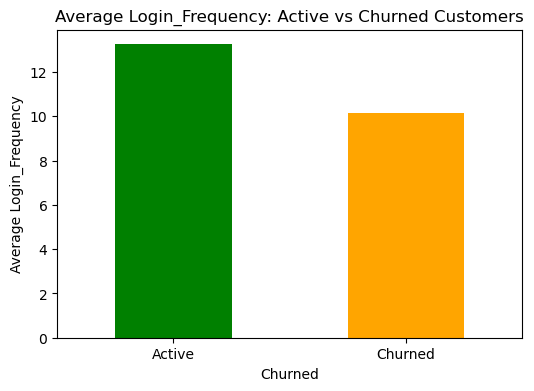

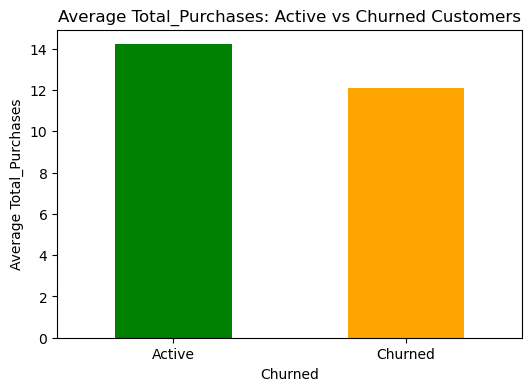

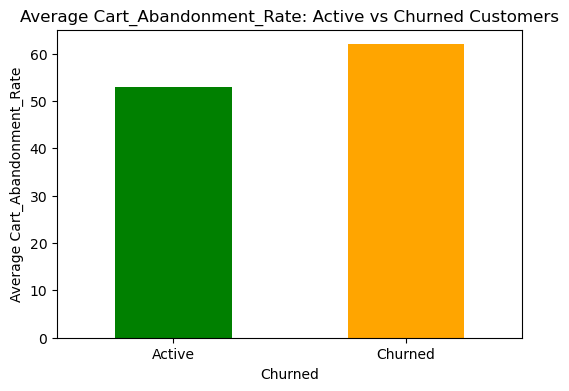

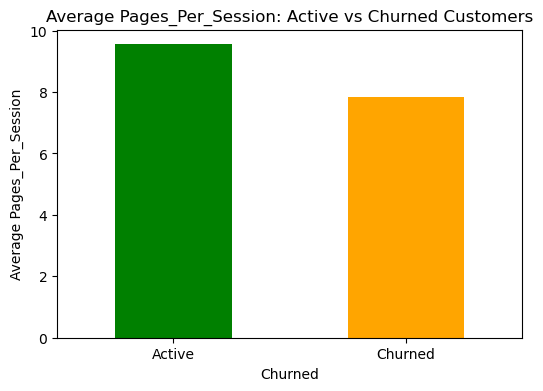

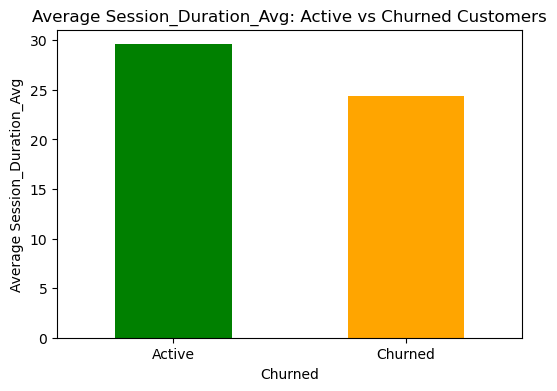

In [15]:
# Step 8: Visualization - compare churned vs active for each metric
for col in behavior_cols:
    plt.figure(figsize=(6,4))
    behavior_summary[col].plot(kind='bar', color=['green','orange'])
    plt.xticks([0,1], ['Active','Churned'], rotation=0)
    plt.ylabel(f'Average {col}')
    plt.title(f'Average {col}: Active vs Churned Customers')
    plt.show()
